In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('whitegrid')



In [2]:
from google.colab import files
print("Please upload your student_feedback.csv file")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print('Loaded file:', filename)



Please upload your student_feedback.csv file


Saving student_feedback.csv to student_feedback.csv
Loaded file: student_feedback.csv


In [3]:
try:
    df = pd.read_csv(filename)
except Exception as e:
    df = pd.read_csv(filename, encoding='latin1')
df.rename(columns=lambda x: 'Student Name' if 'Unnamed' in x else x, inplace=True)

print('\nData snapshot:')
df.head()



Data snapshot:


,Student Name,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [4]:
df.columns = df.columns.str.strip()
print('\nColumns found:', df.columns.tolist())

print('\nMissing values by column:')
print(df.isnull().sum())




Columns found: ['Student Name', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

Missing values by column:
Student Name                                            0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64



Average Ratings per Feedback Category:
Student ID                                              500.000000
Well versed with the subject                              7.497502
Explains concepts in an understandable way                6.081918
Use of presentations                                      5.942058
Provides support for students going above and beyond      5.662338
Structuring of the course                                 5.636364
Course recommendation based on relevance                  5.598402
Solves doubts willingly                                   5.474525
Degree of difficulty of assignments                       5.430569
dtype: float64


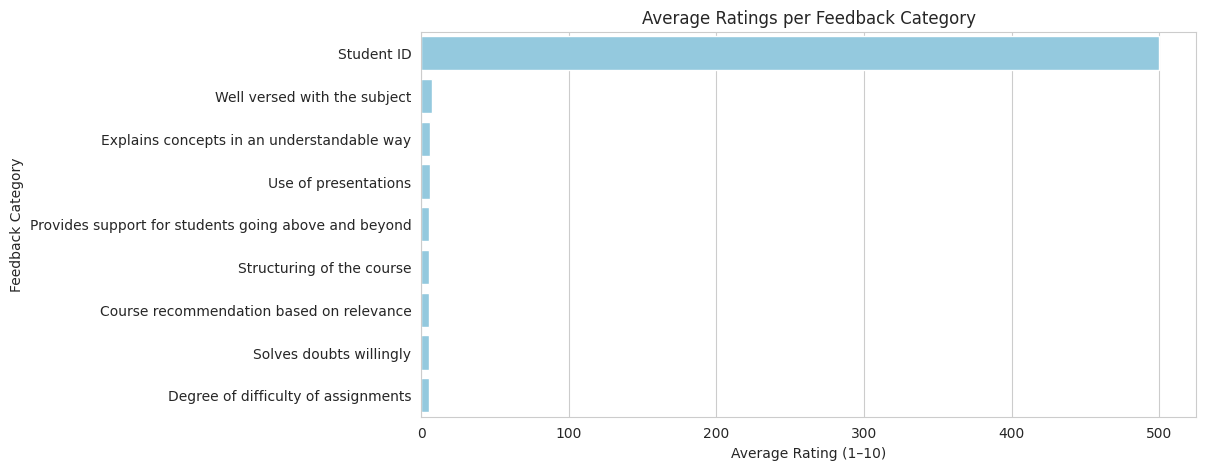

In [5]:
rating_cols = [col for col in df.columns if col not in ['Student Name','Comments']]

average_ratings = df[rating_cols].mean().sort_values(ascending=False)
print("\nAverage Ratings per Feedback Category:")
print(average_ratings)

plt.figure(figsize=(10,5))
sns.barplot(x=average_ratings.values, y=average_ratings.index, color='skyblue')
plt.title('Average Ratings per Feedback Category')
plt.xlabel('Average Rating (1–10)')
plt.ylabel('Feedback Category')
plt.show()



Top 3 Highest Rated Aspects:
Student ID                                    500.000000
Well versed with the subject                    7.497502
Explains concepts in an understandable way      6.081918
dtype: float64

Bottom 3 Lowest Rated Aspects:
Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


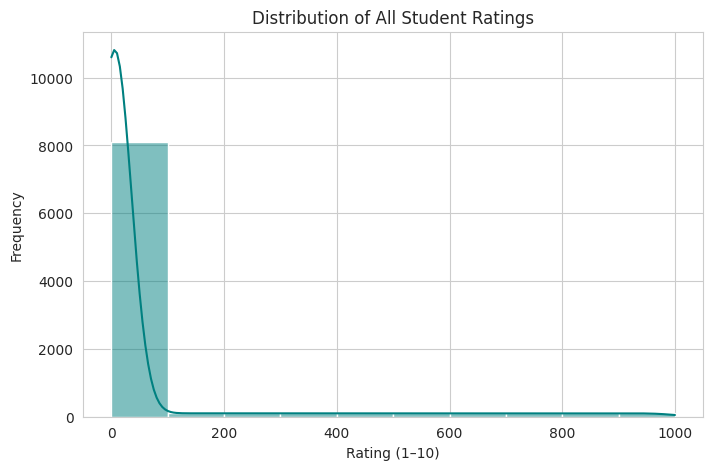

In [6]:
top_3 = average_ratings.head(3)
bottom_3 = average_ratings.tail(3)

print("\nTop 3 Highest Rated Aspects:")
print(top_3)
print("\nBottom 3 Lowest Rated Aspects:")
print(bottom_3)

plt.figure(figsize=(8,5))
sns.histplot(df[rating_cols].values.flatten(), bins=10, kde=True, color='teal')
plt.title('Distribution of All Student Ratings')
plt.xlabel('Rating (1–10)')
plt.ylabel('Frequency')
plt.show()


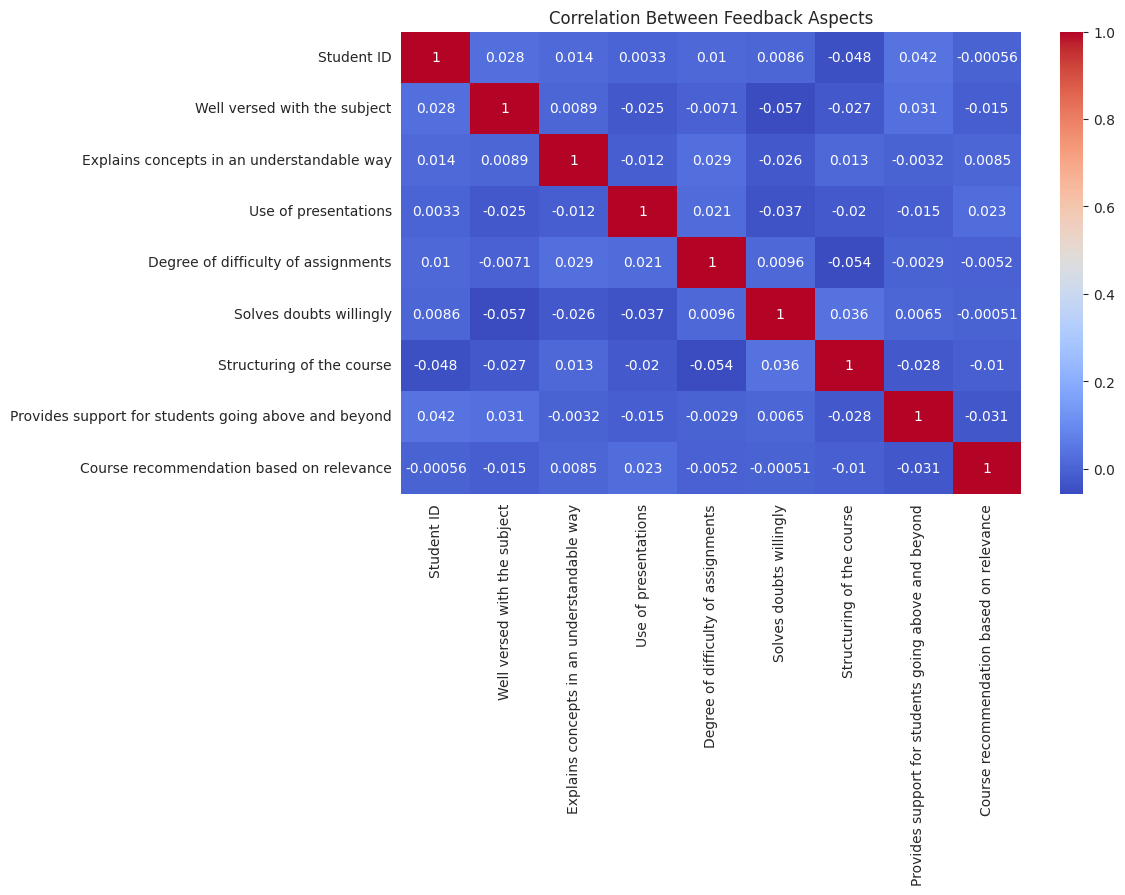

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Feedback Aspects')
plt.show()

In [8]:
if 'Comments' in df.columns:
    df['Sentiment'] = df['Comments'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
    print(df[['Student Name','Comments','Sentiment']].head())
else:
    print("No Comments column found — skipping sentiment analysis.")

    print("\n📊 Insights & Recommendations:")
print(f"1️⃣ Students rated '{top_3.index[0]}' highest, showing strong satisfaction in this area.")
print(f"2️⃣ The lowest-rated aspect is '{bottom_3.index[0]}', suggesting room for improvement.")
print("3️⃣ Maintain excellence in top-rated areas while developing strategies to improve weaker ones.")
print("4️⃣ The correlation chart shows how aspects relate — improving one may boost others.")


No Comments column found — skipping sentiment analysis.

📊 Insights & Recommendations:
1️⃣ Students rated 'Student ID' highest, showing strong satisfaction in this area.
2️⃣ The lowest-rated aspect is 'Course recommendation based on relevance', suggesting room for improvement.
3️⃣ Maintain excellence in top-rated areas while developing strategies to improve weaker ones.
4️⃣ The correlation chart shows how aspects relate — improving one may boost others.


In [13]:
overall_mean = df[rating_cols].mean().mean().round(2)
summary = """
# 🎓 College Event Feedback Analysis Report

**Overall Average Satisfaction:** {overall_mean}/10

## Top 3 Positively Rated Aspects
{top_3}

## Bottom 3 Areas for Improvement
{bottom_3}

## Key Insights
- Students rated {top_aspect} highest, suggesting strong satisfaction.
- {low_aspect} needs improvement.
- The overall satisfaction score indicates generally positive feedback.

*(Generated automatically in Google Colab)*
""".format(
    overall_mean=overall_mean,
    top_3=top_3.to_string(),
    bottom_3=bottom_3.to_string(),
    top_aspect=top_3.index[0],
    low_aspect=bottom_3.index[0]
)

with open('mini_report.md', 'w') as f:
    f.write(summary)

print("✅ Mini report generated and saved as mini_report.md")

df.to_csv('processed_feedback.csv', index=False)
print('\nSaved processed_feedback.csv to working directory')

✅ Mini report generated and saved as mini_report.md

Saved processed_feedback.csv to working directory
